In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [27]:
def squared_exponential(a, b, tau = 1, ell = 1):
    return tau**2*np.exp(-((a-b).T @ (a-b))/(2*ell**2))

def covariance_python(X,Y,tau,ell):
    n = len(X);
    K = np.zeros((n,n));

    for i in tqdm(range(n)):
        for j in range(i,n):
            a = np.array([X[i], Y[i]])
            b = np.array([X[j], Y[j]])
            k = squared_exponential(a,b,tau,ell)
            K[i,j] = k
            K[j,i] = k

    return K


def covariance_cuda(X,Y,tau,ell):

def gaussian_process(x, y, tau = 1, ell = 1, cuda=False):

    X, Y = np.meshgrid(x,y)
    X = X.flatten()
    Y = Y.flatten()

    # Check correct input
    if len(X) != len(Y):
        print("x and y does not have the same length. This is required.")
        return
    
    if cuda:
        K = covariance_cuda(X,Y,tau,ell);
    else:
        K = covariance_python(X,Y,tau,ell);

    n = len(X);
    m = np.zeros(n);
    z = np.random.multivariate_normal(m,K)
    Z = np.reshape(z,(len(x),len(y)))
    return Z

In [34]:
import ctypes
def gaussian_process(x, y, so_file, tau = 1, ell = 1):
    
    # Compute mesh
    X, Y = np.meshgrid(x, y)
    X = X.flatten()
    Y = Y.flatten()
    
    # Get variables for C implementation
    n = len(X)
    X_arr = (ctypes.c_int * len(X))(*X)
    Y_arr = (ctypes.c_int * len(Y))(*Y)

    # Get C function
    c_func = ctypes.CDLL(so_file)

    # Execute C implementation
    c_func.gaussian_process(X_arr, Y_arr, n, tau, ell)

    # Get result from file
    z = 0

    # Return reshaped result
    return np.reshape(z,(len(x),len(y)))

so_file = "./convolution.so"

In [33]:
x = np.linspace(-100,100,100)
y = np.linspace(-100,100,100)
Z = gaussian_process(x, y, tau = 1, ell = 1)

100%|██████████| 10000/10000 [07:46<00:00, 21.46it/s]


In [29]:
Z.shape

(50, 50)

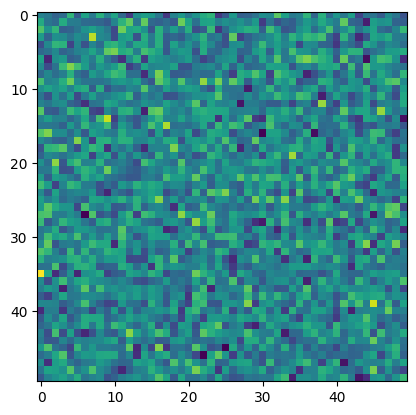

In [31]:
plt.imshow(Z)
plt.colorbar()